# Practice Classification by Neural Networks

> Import Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Replicate a Tensorflow playground diagram

> Create data

In [ ]:
X1 = tf.range(1,1000, 3)
X2 = X1 + 2

## Create a Model

In [ ]:
# set seed
tf.random.set_seed(42)

# create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation= "sigmoid")
])

# compile the model
model.compile(
    loss= "mae",
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics=["mae"]
)

# fit the model
model.fit(tf.expand_dims(X1, axis=-1), X2, epochs=100)


Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 500.4988 - mae: 500.4988
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4961 - mae: 500.4961
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4933 - mae: 500.4933
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4906 - mae: 500.4906
Epoch 5/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4879 - mae: 500.4879
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4851 - mae: 500.4850
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 500.4823 - mae: 500.4823
Epoch 8/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4796 - mae: 500.4796
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 500.4769 - mae: 500.4769
Epoch 10/100
11/11 [==============================] - 0s 2ms/step - loss: 500.4741 - mae: 500.4741
Epoch 11/100
11/11 

## check the summary of model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 12        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


# Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize and model it.
* Create a Dataset using `make_moons()`
* Visualize the data
* Build a model to get 85% accuracy score.

## Create a dataset

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
# make 100 examples
n_samples = 800

# Create a data
X, y = sklearn.datasets.make_moons(
    n_samples,
    noise = 0.04,
    random_state= 42
)

In [ ]:
# cheack out features
X

array([[ 1.64935377, -0.20480589],
       [ 1.48559292, -0.39377668],
       [ 0.87519254,  0.4345377 ],
       ...,
       [-0.52701443,  0.84947919],
       [ 0.02461621,  0.23410416],
       [ 0.72747348,  0.68483688]])

In [ ]:
# check out labels
y

array([1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,

## Visualize the data

In [ ]:
# create dataframe
moons=  pd.DataFrame({'X0':X[:,0], 'X1':X[:,1], 'label':y})

In [ ]:
# view a dataframe
moons.head(5)

,X0,X1,label
0,1.649354,-0.204806,1
1,1.485593,-0.393777,1
2,0.875193,0.434538,0
3,0.477854,-0.413941,1
4,0.946576,0.497997,0


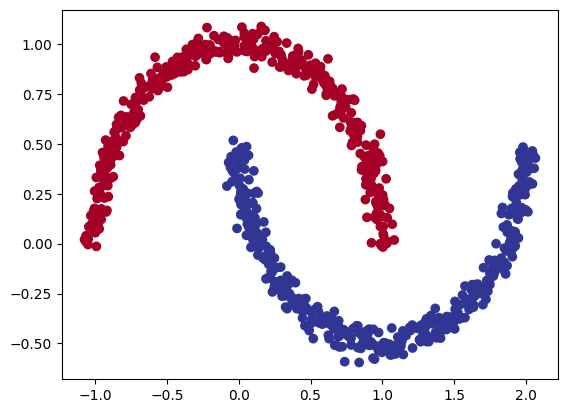

In [ ]:
# visualize the data
plt.scatter(moons['X0'], moons['X1'], c=moons['label'], cmap=plt.cm.RdYlBu)

In [ ]:
# check the shapes
X.shape, y.shape

((800, 2), (800,))

In [ ]:
#check dims and dtype
X.ndim, X.dtype, y.ndim, y.dtype

(2, dtype('float64'), 1, dtype('int64'))

## Creating Model

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(14, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid" )
])

# compile the model
model1.compile(
    loss= tf.keras.losses.BinaryCrossentropy()
    ,optimizer = "Adam"
    ,metrics=["accuracy"]
)

# fit the model
model1.fit(X[:720], y[:720] , epochs=84)

Epoch 1/84
23/23 [==============================] - 1s 4ms/step - loss: 0.7183 - accuracy: 0.5097
Epoch 2/84
23/23 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.7389
Epoch 3/84
23/23 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.8139
Epoch 4/84
23/23 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.8153
Epoch 5/84
23/23 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.8250
Epoch 6/84
23/23 [==============================] - 0s 2ms/step - loss: 0.4989 - accuracy: 0.8264
Epoch 7/84
23/23 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.8375
Epoch 8/84
23/23 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8417
Epoch 9/84
23/23 [==============================] - 0s 2ms/step - loss: 0.3826 - accuracy: 0.8472
Epoch 10/84
23/23 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8514
Epoch 11/84
23/23 [

## Evaluate and visualize

In [ ]:
model1.evaluate(X[720:], y[720:])

3/3 [==============================] - 0s 5ms/step - loss: 0.0377 - accuracy: 1.0000


[0.037702422589063644, 1.0]

In [ ]:
prediction = model1.predict(X)

25/25 [==============================] - 0s 1ms/step


Text(0, 0.5, 'X1')

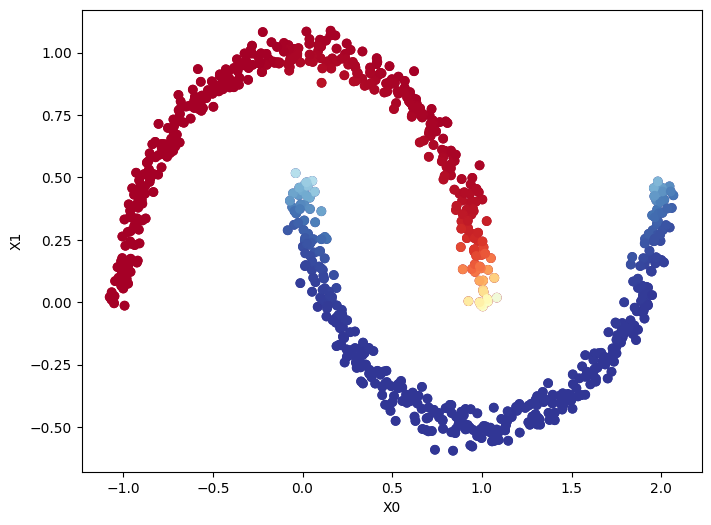

In [ ]:
# plot predcition
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap= plt.cm.RdYlBu)
ax.scatter(X[:, 0], X[:,1], c=prediction, cmap=plt.cm.RdYlBu)
ax.set_xlabel("X0")
ax.set_ylabel("X1")

To visualize model's predcition, let's create a function plot_decision_boundary(), this fucntion will:
* Take in a trained model, features(X) and labels(y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the prediction as well as a line between zones (where each unique class falls)

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predciting on X
  """
  # define the axis boundaries of the plot and create a meshgrid
  x_min,  x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # create X value (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # make predcition
  y_pred = model.predict(x_in)

  # Check for multi class
  if len(y_pred[0]) >1 :
    print("doing multiclass classification")
    # we have to reshape our prediction to get them ready for plotting
    y_pred= np.argmax(y_pred, axis=1 ).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s= 40,  cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


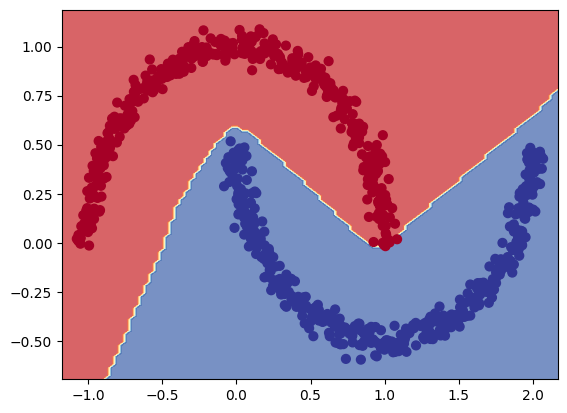

In [ ]:
plot_decision_boundary(model=model1, X=X, y=y)

## Creating softmax Function
> softmax(x_i) = exp(x_i) / sum(exp(x_j))

> where:
> * x_i represents the i-th element of the input vector x.
> * exp(x_i) is the exponential function applied to x_i, which calculates e raised to the power of x_i.
> * sum(exp(x_j)) is the sum of the exponential function applied to all elements of the input vector x.
> * e^x is exponential of x where e is euler and value is 2.718282

In [2]:
import tensorflow as tf
def softmax(x):
  return tf.exp(x)/ sum(tf.exp(x))

In [7]:
tensor = tf.constant([1.0,2.0,3.0])

tf.nn.softmax(tensor), softmax(tensor)

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.09003057, 0.24472848, 0.66524094], dtype=float32)>)

# Working with Fashion mnist
* Explore the data , Create and Train a model to get 88%+ accuracy
* Plot a confusion matrix
* Create function to visualize multiple image prediction for the fashion MNIST at same time.plot ar three and their prediction labels.Hints:see the classification tutorial in TensorFlow docs for ideas.
* Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction in it. Eg. plot 3 images of T-shirt class with their prediction

## Import data and Visualize

In [21]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


# data is already sorted
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# check size
train_data.size, train_labels.size

(47040000, 60000)

In [4]:
# check the number of sample
len(train_data), len(train_labels), len(test_data), len(test_labels)

(60000, 60000, 10000, 10000)

In [5]:
# see datatype
train_data.dtype, train_labels.dtype

(dtype('uint8'), dtype('uint8'))

In [6]:
# check shape
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
# see data
train_data[1], train_labels[1]

(array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
          54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
         255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
         200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
         201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
           0,   0],
        [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
         245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
           0,   0],
        [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
          73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
           0

In [8]:
# check dims
train_data.ndim, train_labels.ndim

(3, 1)

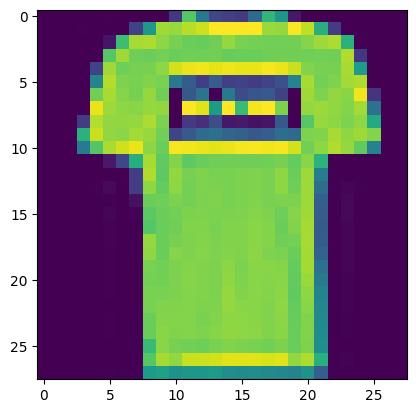

In [9]:
# visualize data
plt.imshow(train_data[1])

In [32]:
# classes name
classes = ["T_shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(classes)

10

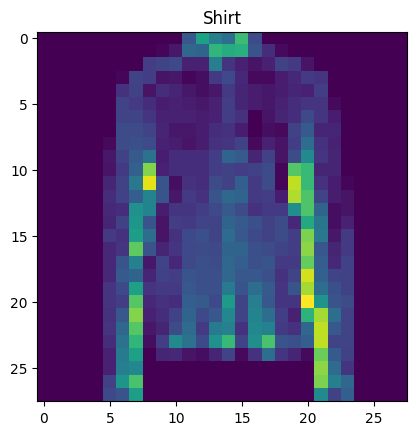

In [11]:
# plot image with class names
import random

index = random.randint(0, len(train_data))
plt.imshow(train_data[index])
plt.title(classes[train_labels[index]]);

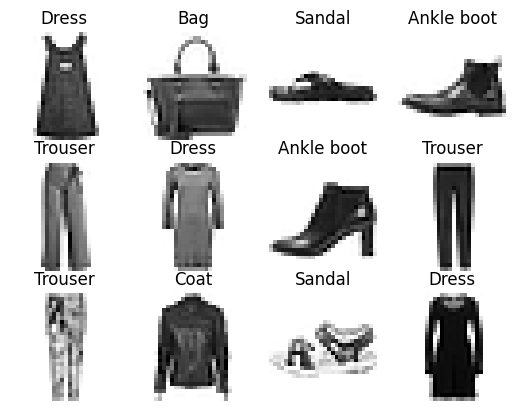

In [12]:
# plotting 12 random images at a time
for i in range(12):
  ax= plt.subplot(3,4, i+1)
  random_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_index], cmap=plt.cm.binary)
  plt.title(classes[train_labels[random_index]])
  plt.axis(False)

## Create a multiclass classification model

In [13]:
# set seed
tf.random.set_seed(42)

# create  a model
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model2.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )

# fit the model
history2= model2.fit(train_data, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 7s 3ms/step - loss: 2.7471 - accuracy: 0.0975
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 2.3026 - accuracy: 0.0981
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: 2.3025 - accuracy: 0.0996
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: 2.3024 - accuracy: 0.0984
Epoch 5/25
469/469 [==============================] - 1s 3ms/step - loss: 2.3013 - accuracy: 0.0989
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: 2.2726 - accuracy: 0.1136
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: 2.2547 - accuracy: 0.1213
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: 2.2302 - accuracy: 0.1307
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: 2.1649 - accuracy: 0.1580
Epoch 10/25
469/469 [==============================] - 2s 3ms/step - loss: 2.1338 - accuracy: 0.1658

## Ṇormalizing the data
* Neural networks prefer data to be scaled(or normalized) this means they like to have numbers between 0 and 1
> We can get our training and test data between 0 and 1 by dividing to maximum

In [22]:
# divide data with maximum
train_data_normal = train_data/255
test_data_normal = test_data/255

# check min and max
train_data_normal.min(), train_data_normal.max()

(0.0, 1.0)

> Fit the model 3 on this data

In [15]:
# random seed
tf.random.set_seed(42)

# create a model
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compile the model
model3.compile(
    optimizer="adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"]
)

# fit the model
norm_history = model3.fit(train_data_normal, train_labels, validation_data=(test_data_normal, test_labels), epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9375 - accuracy: 0.6604 - val_loss: 0.6400 - val_accuracy: 0.7904
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5726 - accuracy: 0.7990 - val_loss: 0.5842 - val_accuracy: 0.7904
Epoch 3/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5258 - accuracy: 0.8152 - val_loss: 0.5561 - val_accuracy: 0.8032
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4979 - accuracy: 0.8253 - val_loss: 0.5452 - val_accuracy: 0.8064
Epoch 5/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4822 - accuracy: 0.8304 - val_loss: 0.5361 - val_accuracy: 0.8087
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4672 - accuracy: 0.8339 - val_loss: 0.5339 - val_accuracy: 0.8089
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4594 - accuracy: 0.8372 - val_loss: 0.5158 - val_accuracy:

> Creating model with more layers

In [76]:
# random seed
tf.random.set_seed(42)

# create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(12, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# compiling the model
model_4.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer= "adam",
    metrics=["accuracy"]
)

# fit the model
model_4.fit(train_data_normal, train_labels, epochs=20, validation_data=(test_data_normal, test_labels))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9125 - accuracy: 0.6642 - val_loss: 0.6999 - val_accuracy: 0.7553
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6465 - accuracy: 0.7694 - val_loss: 0.6392 - val_accuracy: 0.7736
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6136 - accuracy: 0.7813 - val_loss: 0.6341 - val_accuracy: 0.7733
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5972 - accuracy: 0.7873 - val_loss: 0.6218 - val_accuracy: 0.7837
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5848 - accuracy: 0.7916 - val_loss: 0.6023 - val_accuracy: 0.7906
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5755 - accuracy: 0.7951 - val_loss: 0.6063 - val_accuracy: 0.7877
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5686 - accuracy: 0.7991 - val_loss: 0.6137 - val_accuracy

> let's build model 3 again as this model do not perform well.. increase neurons in model 3

In [23]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(32,activation= "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_5.compile(
    loss= tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer="adam",
    metrics=["accuracy"]
)

history5 =model_5.fit(train_data_normal, train_labels, epochs=25, validation_data=(test_data_normal, test_labels))

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5269 - accuracy: 0.8149 - val_loss: 0.4321 - val_accuracy: 0.8442
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3912 - accuracy: 0.8595 - val_loss: 0.4761 - val_accuracy: 0.8389
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3578 - accuracy: 0.8694 - val_loss: 0.4025 - val_accuracy: 0.8500
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3359 - accuracy: 0.8778 - val_loss: 0.3900 - val_accuracy: 0.8578
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3215 - accuracy: 0.8820 - val_loss: 0.3864 - val_accuracy: 0.8592
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3088 - accuracy: 0.8850 - val_loss: 0.3932 - val_accuracy: 0.8539
Epoch 7/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3014 - accuracy: 0.8896 - val_loss: 0.3874 - val_accuracy:

## Visualize and Evaluate the model

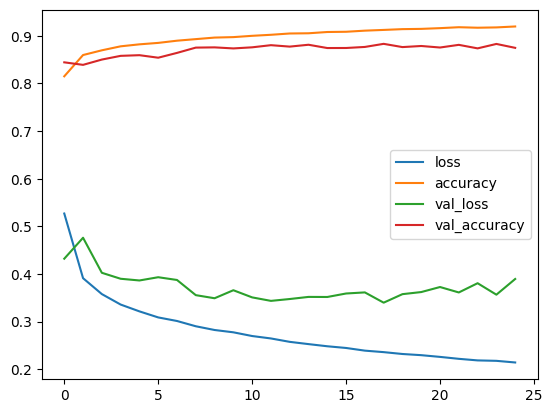

In [24]:
import pandas as pd
# plotting history
pd.DataFrame(history5.history).plot();

In [25]:
# making prediction
probs = model_5.predict(test_data_normal)

y_preds = probs.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


### Plot Confusion matrix

In [26]:
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10),text_size=15 ):

  # create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis] # normalize confusion matrix
  n_classes = cm.shape[0]

  # let's prettify it
  fig, ax= plt.subplots(figsize=figsize)
  # create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

# set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # label the axes
  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks = np.arange(n_classes),
        yticks= np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # adjust label axis
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # set the thresold for different colors
  thresold = (cm.max() + cm.min())/2

  # plot the textr on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i , f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i, j] > thresold else "black",
    size=15)

In [27]:
# confusion matrix
make_confusion_matrix(y_true=test_labels, y_pred=y_preds ,classes=classes, figsize=(20,20), text_size=8)

NameError: ignored

### Image evaluation function

* Create function to visualize multiple image prediction for the fashion MNIST at same time.plot ar three and their prediction labels.Hints:see the classification tutorial in TensorFlow docs for ideas.
* Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction in it. Eg. plot 3 images of T-shirt class with their prediction

> Create a function to do so:

* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label and the predicted label

In [49]:
import random

def plot_image(model, n, classes, true_labels, images):
  """
  plots random images in range of i
  """
  for i in range(n):
        ax= plt.subplot(3,4, i+1)
        # random_index = random.choice(range(len(test_data_normal)))
        random_index =  random.randint(0, len(images)-1)
        # true_label, img = true_label[random_index], img[random_index]
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.axis(False)
        # plt.imshow(images[random_index], cmap=plt.cm.binary)
        # plt.imshow(train_data[random_index], cmap=plt.cm.binary)
        # plt.title(classes[train_labels[random_index]])

        # create predciton and targbets
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1,28,28))
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]


        # predicted_label = np.argmax(predictions_array)
        if pred_label == true_label:
          color = 'blue'
        else:
          color = 'red'

        plt.xlabel("{} {:2.0f}% ({})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),color=color)
        plt.imshow(target_image, cmap=plt.cm.binary)

def plot_value_array(i, predictions_array, true_label):
  """
  plots bar chart of predicted image
  """
  for i in range(i):
        true_label = true_label[i]
        plt.grid(False)
        plt.xticks(range(10))
        plt.yticks([])
        thisplot = plt.bar(range(10), predictions_array, color="#777777")
        plt.ylim([0, 1])
        predicted_label = np.argmax(predictions_array)

        thisplot[predicted_label].set_color('red')
        thisplot[true_label].set_color('blue')

Beautiful function shows images and prediction

In [94]:
import random

def plot_images(model, n, classes, true_labels, images):
    """
    Plots random images and their predicted and true labels.
    """
    for i in range(n):
        ax = plt.subplot(5, 2, i+1)
        random_index = random.randint(0, len(images)-1)
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]

        if pred_label == true_label:
            color = "blue"
        else:
            color = "red"
        ax.set_title("{} {:2.0f}% ({})".format(pred_label, 100*np.max(pred_probs), true_label),
                 color=color)
        ax.axis(False)
        ax.imshow(target_image, cmap=plt.cm.binary);
    plt.tight_layout() #adjust the layout
    plt.show();


Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction in it. Eg. plot 3 images of T-shirt class with their prediction

In [112]:
def predict_class(model, images, true_labels, classes, class_num, num_images):
    """
    Takes random class and makes prediction on it
    """
    class_indices = [index for index, label in enumerate(true_labels) if label == class_num]
    random_indices = random.sample(class_indices, num_images)

    for i, random_index in enumerate(random_indices):
        target_image = images[random_index]
        pred_probs = model.predict(target_image.reshape(1, 28, 28), verbose=0)
        pred_label = classes[pred_probs.argmax()]
        true_label = classes[true_labels[random_index]]

        color = "blue" if pred_label == true_label else "red"

        ax = plt.subplot(3, 3, i+1)
        ax.set_title("{} {:2.0f}% ({})".format(pred_label, 100*np.max(pred_probs), true_label),
                     color=color)
        ax.axis(False)
        ax.imshow(target_image, cmap=plt.cm.binary)

    plt.tight_layout() # Adjust the layout
    plt.show()


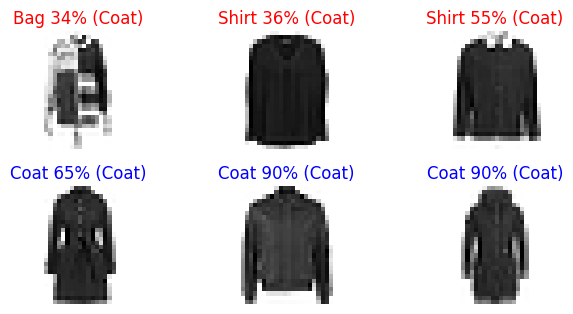

In [113]:
predict_class(model=model_4, images=test_data_normal,true_labels= test_labels, classes=classes, class_num = 4, num_images = 6 )

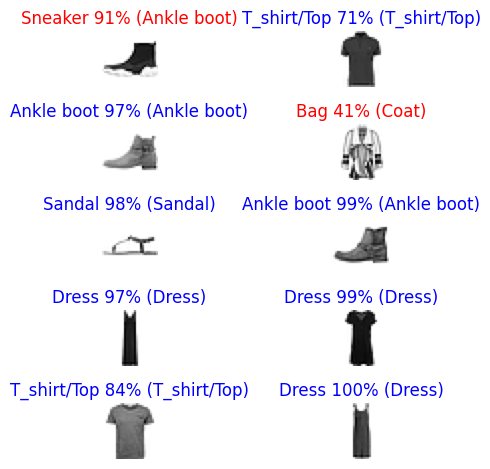

In [114]:
plot_images(model=model_4, n=10, classes=classes, true_labels= test_labels, images = test_data_normal);